In [1]:

%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


from gridtools.b2_tools import *
from gridtools.utils import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2
%matplotlib tk

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [2]:

import h5py
import os
import numpy											as np
import matplotlib
import matplotlib.pyplot							as pyp
from matplotlib.backends.backend_pdf	import PdfPages
from eirene.get_wall_triangle					import get_wall_triangle
from routines.h5_routines							import h5_read
from files.load_refpar_file							import load_refpar_file
from files.load_ions_list								import load_ions_list
from files.load_soledge_mesh_file				import load_soledge_mesh_file
from files.load_eirene_triangles					import load_eirene_triangles

In [3]:
path=os.path.join(onedrive_path, r"Project\collab\tech\compare_data\soledge_cases\copy_wallStd_bra_nocore_D")
rz0_line = [0.,0.]
theta_line=0.
log_scale=0
one_plot=0
no_samex=0
save="none"

## Setup

In [4]:
print("plot1d_wall_fluxes")

#	Read reference parameters

RefPar = load_refpar_file(os.path.join(path, "Results"))
Ions = load_ions_list(path)

#	Read wall

if_mesh = h5py.File(os.path.join(path, "mesh.h5"), "r")

try:
    Rwall	= h5_read(if_mesh, "walls/wall1/R")
    Zwall	= h5_read(if_mesh, "walls/wall1/Z")
except:
    Rwall	= h5_read(if_mesh, "wall/R")
    Zwall	= h5_read(if_mesh, "wall/Z")

if_mesh.close()

#	Find wall intersection along line


Eirene = load_eirene_triangles(os.path.join(path, "triangles.h5"))
ZeroTriangle, ZeroSide, Ri, Zi = get_wall_triangle(Eirene, rz0_line=rz0_line, theta_line=theta_line, no_plot=1, no_print=1)
Eirene = 0

#	Read Eirene mesh

if_tri	 = h5py.File(os.path.join(path, "triangles.h5"), "r")

TriKnots = h5_read(if_tri,"triangles/tri_knots")
TriKnots = TriKnots - 1 										#Matlab/Fortan to python indexes
R		 = h5_read(if_tri,"knots/R")*0.01
Z		 = h5_read(if_tri,"knots/Z")*0.01

if_tri.close()


try:
    AFluxF	 = np.loadtxt(os.path.join(path, "soledge2D.atoms_fluxes_wall_1"), dtype='f8')
#            		[0:iTri, 1:iSide, 2:iProp, 3:dlWall, 
#					 4:Flux_Atom_Incident, 			5:Flux_Mol_Incident,
#					 6:Flux_Atom_Emitted_from_Ion, 	7:Flux_Mol_Emitted_from_Ion,
#					 8:Flux_Atom_Emitted_from_Atom, 9:Flux_Mol_Emitted_from_Atom]
except:
    print("\tError: Not found "+ path+"soledge2D.atoms_fluxes_wall_1")
    exit()
iTri	= AFluxF[:,0]-1 										#Matlab/Fortan to python indexes
iSide	= AFluxF[:,1]-1 										#Matlab/Fortan to python indexes
WallL	= AFluxF[:,3]
AFluxF  = 0

Vertex	= np.array([[0,1],[1,2],[2,0]], dtype='i4')
iTri	= iTri.astype(int)
iSide	= iSide.astype(int)

iZero = np.where(iTri == ZeroTriangle); iZero = iZero[0]
if(len(iZero) != 1):
    print("\tError: not found wall triangle intersection with line")
    exit()

iZero  = iZero[0]
zOrder = np.arange(len(iTri))
zOrder = np.append(zOrder[iZero:], zOrder[:iZero]) 
iTri   = iTri[zOrder]

iSide  = iSide[zOrder]
WallL[iZero:]  = WallL[iZero:] - WallL[iZero]
WallL[:iZero]  = WallL[:iZero] - WallL[0] + WallL[-1]
WallL		   = WallL[zOrder]

WallR	= 0.5*(R[TriKnots[iTri,Vertex[iSide,0]]]+R[TriKnots[iTri,Vertex[iSide,1]]])
WallZ	= 0.5*(Z[TriKnots[iTri,Vertex[iSide,0]]]+Z[TriKnots[iTri,Vertex[iSide,1]]])
WalldL  = np.sqrt((R[TriKnots[iTri,Vertex[iSide,0]]]-R[TriKnots[iTri,Vertex[iSide,1]]])**2 + \
                    (Z[TriKnots[iTri,Vertex[iSide,0]]]-Z[TriKnots[iTri,Vertex[iSide,1]]])**2)



plot1d_wall_fluxes
load_eirene_triangles: reading file  c:\Users\mikek\OneDrive\Project\collab\tech\compare_data\soledge_cases\copy_wallStd_bra_nocore_D\triangles.h5
wall_segments
wall_segments: completed
	h5_read: error reading:  /walls_eirene_external/nExtWalls
	h5_read: error reading:  surfaces/nSurfaces
load_eirene_triangles: Completed
get_wall_triangle
get_wall_triangles
get_wall_triangles.2: Completed
get_wall_triangle: Completed


c:\Users\mikek\OneDrive\Project\python-packages\soledge\routines\h5_routines.py:65: FutureWarning: In the future `np.str` will be defined as the corresponding NumPy scalar.
  Data = Data.astype(np.str)


## Read fluxes

In [5]:
try:
    FluxiF	 = np.loadtxt(os.path.join(path,"soledge2D.ion_fluxes_wall_1"), dtype='f8')
#            		[0:iTri, 1:iSide, 2:iProp, 3:dlSurf, 
#					 4:Flux_Ion_Incident, 			5:Flux_Atom_Emitted_from_Ion]
except:
    print("\tError: Not found "+ path+"soledge2D.ion_fluxes_wall_1")
    exit()
Fluxi =  FluxiF[zOrder,4]*1e-22
FluxiF  = 0

In [6]:
#Reads neutral flux
FluxiN=[]
try:
    FluxiN.append(np.loadtxt(os.path.join(path, "soledge2D.atoms_fluxes_wall_1"), dtype='f8'))
#            		[0:iTri, 1:iSide, 2:iProp, 3:dlWall, 
#					 4:Flux_Atom_Incident, 			5:Flux_Mol_Incident,
#					 6:Flux_Atom_Emitted_from_Ion, 	7:Flux_Mol_Emitted_from_Ion,
#					 8:Flux_Atom_Emitted_from_Atom, 9:Flux_Mol_Emitted_from_Atom]
    i=2
    while(os.path.isfile('./soledge2D.atoms_fluxes_wall_'+str(i))):
        FluxiN.append(np.loadtxt(path+"soledge2D.atoms_fluxes_wall_"+str(i), dtype='f8'))
        i=i+1
except:
    print("\tError: Not found "+ path+"soledge2D.atoms_fluxes_wall_1")
    exit()

In [7]:
fluxN=[]	#Neutral flux to the wall	[[fD][fD2][fI1]...[fIn]]
fluxN.append(FluxiN[0][zOrder,4])
fluxN.append(FluxiN[0][zOrder,5])
for i in range(len(FluxiN)-1):
    fluxN.append(FluxiN[i+1][zOrder,4])
for i in range(len(fluxN)):
    fluxN[i]=fluxN[i]*1e-22

try:
    details = False
    if(details):
        EFluxF	 = np.loadtxt(os.path.join(path, "soledge2D.energy_fluxes_details_1"), dtype='f8', comments="%")
#			[0:dlWall, 
#			1:Flux_Energy_incident_Electron, 	2:Flux_Energy_incident_Ions
#			3:Flux_Energy_Total,				4:Flux_Energy_incident_Atoms,
#			5:Flux_Energy_Radiation_Atoms,		6:Flux_Energy_Rad_Recombination,
#			7:Flux_Energy_Recombination_in_Wall,8:Flux_Energy_incident_Molecules]
        FluxEe		= EFluxF[zOrder,1]*1.e-6
        FluxEi		= EFluxF[zOrder,2]*1.e-6
        FluxETot	= EFluxF[zOrder,3]*1.e-6
        FluxERadTot	= EFluxF[zOrder,5]*1.e-6

    else:
        EFluxF	 = np.loadtxt(os.path.join(path, "soledge2D.energy_fluxes_1"), dtype='f8', comments="%")
#           [0:iTri, 1:iSide, 2:iProp, 3:dlWall, 
#			 4:Flux_Energy_incident_Ions_EIRENE	5:Flux_Energy_incident_Electron,
#			 6:Flux_Energy_incident_Ions		7:Flux_Energy_Total,				
#			 8:Flux_Energy_incident_Atoms,		9:Flux_Energy_Radiation		
#			 10:Area]
        FluxEe		= EFluxF[zOrder,5]*1.e-6
        FluxEi		= EFluxF[zOrder,6]*1.e-6
        FluxETot	= EFluxF[zOrder,7]*1.e-6
        FluxERadTot	= EFluxF[zOrder,9]*1.e-6
except:
    print("\tError: Not found "+ path+"soledge2D.energy_fluxes_details_1")
    exit()

FluxETotei	= FluxETot-FluxERadTot
EFluxF	= 0

## Format and scaling

In [8]:
TFluxi  		= 2.*np.pi*np.sum(Fluxi*WalldL*WallR)
TFluxEe			= 2.*np.pi*np.sum(FluxEe*WalldL*WallR)
TFluxEi			= 2.*np.pi*np.sum(FluxEi*WalldL*WallR)
TFluxETot		= 2.*np.pi*np.sum(FluxETot*WalldL*WallR)
TFluxERadTot	= 2.*np.pi*np.sum(FluxERadTot*WalldL*WallR)
TFluxETotei		= 2.*np.pi*np.sum(FluxETotei*WalldL*WallR)

TaFlux = 2.*np.pi*np.sum(fluxN[0]*WalldL*WallR)
TmFlux = 2.*np.pi*np.sum(fluxN[1]*WalldL*WallR)
if (len(fluxN)>2):
    TnFluxi = 2.*np.pi*np.sum(fluxN[2]*WalldL*WallR)

sTFluxi 		= "{:0.3f}".format(TFluxi)				#D+ total aion flux to the wall
sTFluxETot		= "{:0.3f}".format(TFluxETot)
sTFluxETotei	= "{:0.3f}".format(TFluxETotei)
sTFluxERadTot	= "{:0.3f}".format(TFluxERadTot)

sTaFlux = "{:0.3f}".format(TaFlux)				#D total atom flux from the wall
sTmFlux= "{:0.3f}".format(TmFlux)				#D2 total molecular flux from the wall
if (len(FluxiN)>2):
    sTnFluxi = "{:0.3f}".format(TnFluxi)

print("TFluxEe       =",TFluxEe)
print("TFluxEi       =",TFluxEi)
print("TFluxETot     =",TFluxETot)
print("TFluxERadTot  =",TFluxERadTot)
print("TFluxi        =",TFluxi*1e22)			#D+ total aion flux to the wall
print("TfluxD         =",TaFlux*1e22)			#D total atom flux to the wall
print("TfluxD_2       =",TmFlux*1e22)			#D2 total molecular flux to the wall
if (len(FluxiN)>2):
    print("Tflux_i        =",TnFluxi*1e22)				#Impurity total atom flux from the wall
    print("C_div         =",TnFluxi/2/TmFlux*100,"%")

TFluxEe       = 0.6212996755902065
TFluxEi       = 0.6523901990065335
TFluxETot     = 1.529054084728232
TFluxERadTot  = 0.02536232315029094
TFluxi        = 1.9225508690301788e+22
TfluxD         = 3.830405285292591e+22
TfluxD_2       = 1.6986877822009659e+22


## Plot prep

In [9]:
#	Prepare for plotting

if(save == "pdf"):	pdf = PdfPages("plot1d_wall_fluxes_t={:.3f}.".format(RefPar.time)+save)   #pdf in one file only

Fig = []
Ax  = []
Titles	   = ["$\Gamma_{TotI}="+sTFluxi+"\ (*10^{22})$",
                "$\Gamma_{TotE}="+sTFluxETot+",\ \Gamma_{Tot,ei}="+sTFluxETotei+",\ \Gamma_{Tot,Rad}="+sTFluxERadTot+"\ (MW)$",
                "$\Gamma_{TotD}="+sTaFlux+",\ \Gamma_{TotD2}="+sTmFlux+"\ (*10^{22})$"]
xLabels    = ["$wall\ (m)$", "$wall\ (m)$","$wall\ (m)$"]
yLabels    = ["$\Gamma_p\ (*10^{22}\ m^{-3})$", "$\Gamma_E\ (MW/m^2)$","$\Gamma_{n}\ (*10^{22}\ m^{-3})$"]


if(one_plot != 1):
    Fig.append(pyp.figure())
    for i in range(len(yLabels)):
        if((i == 0) or (no_samex != 0)):	Ax.append(Fig[0].add_subplot(len(yLabels),1,i+1))
        else:								Ax.append(Fig[0].add_subplot(len(yLabels),1,i+1, sharex = Ax[0]))

    Fig[-1].tight_layout(pad=2., w_pad=3., h_pad=3.)
else:
    for i in range(len(yLabels)):
        Fig.append(pyp.figure())

        Ax.append(Fig[i].add_subplot(111))
        Fig[-1].tight_layout()
    
for i in range(len(xLabels)):
    Ax[i].autoscale(enable=True, axis='both', tight=True)
    if(i==0):	Ax[i].set_title(os.path.basename(os.path.abspath(path))+" @ t={:.3f} s: ".format(RefPar.time)+Titles[i])
    else:		Ax[i].set_title(Titles[i])
    Ax[i].set_xlabel(xLabels[i])
    Ax[i].set_ylabel(yLabels[i])
    if(log_scale == 0):
        Ax[i].set_yscale('linear')
    else:
        Ax[i].set_yscale('log')

## Plot

In [10]:
#	Plot parameters

pl = []
pl.append(Ax[len(pl)].plot(WallL, Fluxi, label="$\Gamma_i$"))

pl.append(Ax[len(pl)].plot(WallL, FluxETot, label="$\Gamma_{E,tot}$"))

Ax[len(pl)-1].plot(WallL, FluxERadTot, label="$\Gamma_{E,Rad}$")
Ax[len(pl)-1].plot(WallL, FluxETotei, label="$\Gamma_{E,Par}$")
Ax[len(pl)-1].plot(WallL, FluxEe, label="$\Gamma_{E,e}$")
Ax[len(pl)-1].plot(WallL, FluxEi, label="$\Gamma_{E,i}$")

pl.append(Ax[len(pl)].plot(WallL, fluxN[0], label="$\Gamma_{D}$"))
Ax[len(pl)-1].plot(WallL, fluxN[1], label="$\Gamma_{D2}$")
for i in range(len(FluxiN)-1):
    Ax[len(pl)-1].plot(WallL, fluxN[i+2]*1e2, label="$\Gamma_{imp}*100$")

for i in range(len(Ax)):
    Ax[i].legend(fontsize='medium')

for figure in Fig:  figure.patch.set_facecolor('white')

if(save != "none"):
    if(save == "csv"):

        save_cvs= np.zeros((len(WallL),6), dtype='f8')
        save_cvs[:,0]  = WallR
        save_cvs[:,1]  = WallZ
        save_cvs[:,2]  = WallL
        save_cvs[:,3]  = Fluxi*1e22
        save_cvs[:,4]  = FluxETot*1e6
        save_cvs[:,5]  = FluxERadTot*1e6

        Header = "R (m), Z (m), L (m), i_flux (m^-3), Etot (W/m^2), FluxERadTot (W/m^2)"
        np.savetxt("wall_fluxes_{:s}_t={:.3f}.csv".format(os.path.basename(os.path.abspath(path)),RefPar.time),  save_cvs, header=Header, delimiter=",", fmt="%15.7e", comments="")

    else:
        for i in range(len(Fig)):
            if(one_plot != 1): Fig[i].set_size_inches(10.05,7.44)
            if(save == "pdf"):
                pdf.savefig(Fig[i])
            else:
                Fig[i].savefig("plot1d_wall_fluxes_t={:.3f}_{:d}.".format(RefPar.time,i+1)+save)

    pyp.show(block=False)
    pyp.close()
else:
    pyp.show()

if(save == "pdf"):	pdf.close()

print("plot1d_wall_fluxes: Completed")

plot1d_wall_fluxes: Completed


## Extract data with dataframe

In [23]:
# CHeck function for up to date units and labels
df = pd.DataFrame()
df["R"] = WallR    # Element R coord [m]
df["Z"] = WallZ    # Element Z coord [m]
df["L"] = WallL    # Element length [m]
df["pflux_i"] = Fluxi   # Ion particle flux [s-1]
df["hflux_tot"] = FluxETot    # [Wm-2]
df["hflux_totrad"] = FluxERadTot    # [Wm-2]
df["hflux_par_tot"] = FluxETotei    # 
df["hflux_par_e"] = FluxEe
df["hflux_par_i"] = FluxEi
df["hflux_a"] = fluxN[0]   # Neutral atom hflux
df["hflux_m"] = fluxN[1]   # Neutral molecule hflux
df["hflux_n"] = fluxN[0] + fluxN[1]    # Total neutral hflux
df

,R,Z,L,pflux_i,hflux_tot,hflux_totrad,hflux_par_tot,hflux_par_e,hflux_par_i,hflux_a,hflux_m,hflux_n
0,0.987017,0.016437,0.000000,0.000000,0.017715,0.000501,0.017214,4.410440e-13,0.0,0.060634,0.010353,0.070987
1,0.986665,0.081756,0.064694,0.000000,0.021681,0.000506,0.021175,0.000000e+00,0.0,0.061781,0.010982,0.072762
2,0.983368,0.145121,0.127041,0.000000,0.020725,0.000514,0.020210,1.247340e-11,0.0,0.061001,0.012303,0.073304
3,0.972790,0.203670,0.184094,0.000000,0.023187,0.000526,0.022661,4.846739e-11,0.0,0.061407,0.010731,0.072138
4,0.964451,0.234415,0.190752,0.000000,0.024758,0.000540,0.024218,4.789705e-11,0.0,0.057134,0.009925,0.067059
...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.959833,-0.251438,4.919134,0.000000,0.021513,0.000521,0.020992,2.530495e-11,0.0,0.062973,0.011615,0.074588
351,0.967534,-0.223057,4.949724,0.000000,0.017166,0.000512,0.016654,4.842809e-11,0.0,0.058262,0.010757,0.069019
352,0.978912,-0.178217,5.011663,0.000045,0.018667,0.000502,0.018165,4.556479e-11,0.0,0.060014,0.011758,0.071772
353,0.986506,-0.115438,5.077064,0.000000,0.018037,0.000495,0.017542,0.000000e+00,0.0,0.058804,0.011375,0.070179


In [26]:
%matplotlib inline

AttributeError: Line2D.set() got an unexpected keyword argument 'colors'

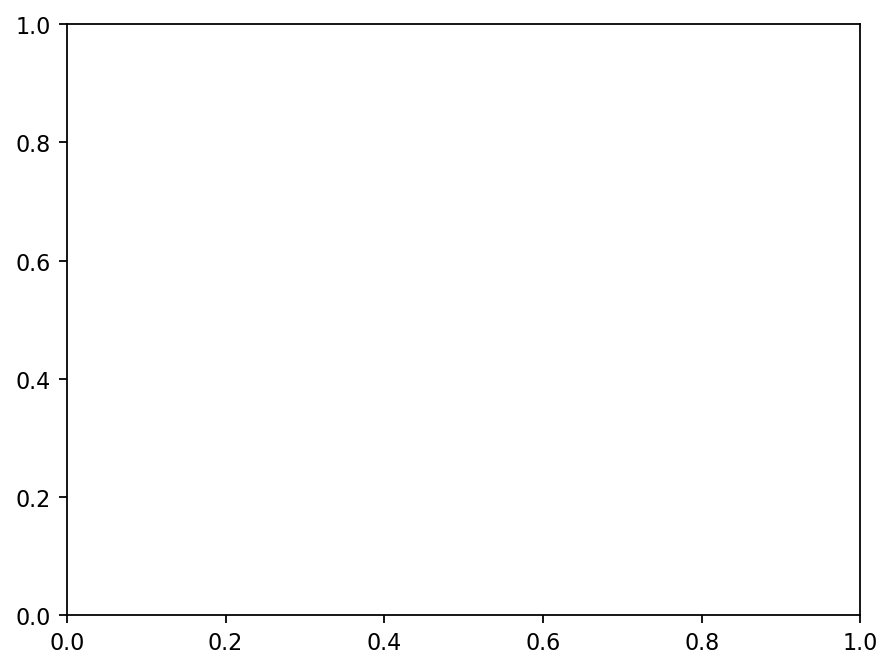

In [37]:
fig, ax = plt.subplots(dpi = 160)

ax.plot(df["R"], df["Z"], colors = df["hflux_par_tot"])
ax.set_aspect("equal")